In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import import_ipynb
from function_for_eda import *

importing Jupyter notebook from function_for_eda.ipynb


## Read Dataset

In [2]:
bureau = pd.read_csv(r'C:\Users\ci\OneDrive - National Economics University\Study NEU\Visual\Final Project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_bureau.csv', sep=',')
bureau_balance = pd.read_csv(r'C:\Users\ci\OneDrive - National Economics University\Study NEU\Visual\Final Project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_bureau_balance.csv', sep=',')
application_train = pd.read_csv(r'C:\Users\ci\OneDrive - National Economics University\Study NEU\Visual\Final Project\dseb63_final_project_DP_dataset\dseb63_final_project_DP_dataset\dseb63_application_train.csv')

# Bureau Balance

Bảng Bureau Balance chứa các thông tin về các khoản vay của khách hàng bên ngoài Home Credit và được báo cáo bởi Credit Bureau Department.

In [3]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


### Basic Information

In [4]:
print_basic_information(bureau_balance, 'Bureau Balance', ['SK_ID_BUREAU'])

The shape of Bureau Balance is: (27299925, 3)
----------------------------------------------------------------------------------------------------
Number of duplicate values in Bureau Balance: 0
----------------------------------------------------------------------------------------------------
Number of unique SK_ID_BUREAU in Bureau Balance are: 817395


<b>Nhận xét</b>: <br>
File bureau_balance.csv có hơn 27M datapoints và 3 features. Trong đó có 1 feature là SK_ID_BUREAU để chỉ ID cho các khoản vay của khách hàng.
- <b>SK_ID_BUREAU</b> là mã số cho khoản vay trước đó của khách hàng từ các tổ chức tài chính khác. Có thể có nhiều khoản vay trước đó tương ứng với một SK_ID_CURR duy nhất, tùy thuộc vào lịch sử vay của khách hàng.

Hai features còn lại là MONTHS_BALANCE và STATUS.
- MONTHS_BALANCE: Trạng thái hàng tháng cho từng khoản vay trước đó của một khách hàng cụ thể do Credit Bureau Department thống kê.
- STATUS: Trạng thái khoản vay tín dụng Credit Bureau trong tháng

In [5]:
get_column_names_by_type(bureau_balance)

{'int64': ['SK_ID_BUREAU', 'MONTHS_BALANCE'], 'object': ['STATUS']}

### Missing Values

In [6]:
count_missing_values(bureau_balance)

Your data frame has 3 columns.
There are 0 columns that have missing values.


,total_nan,percent_nan


Bảng Bureau Balance không có chứa giá trị NaN.

***Merging the TARGET from application_train to bureau_balance table.***

In [7]:
bureau_balance_merged = pd.merge(bureau_balance, bureau[['SK_ID_BUREAU', 'SK_ID_CURR']], on='SK_ID_BUREAU', how='inner')
bureau_balance_merged = pd.merge(bureau_balance_merged, application_train[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='inner')
bureau_balance_merged.head(3)

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,SK_ID_CURR,TARGET
0,5715448,0,C,137415,0
1,5715448,-1,C,137415,0
2,5715448,-2,C,137415,0


### Plotting Categorical Variables

In [8]:
print_unique_categories(bureau_balance, 'STATUS', True)

----------------------------------------------------------------------------------------------------
The unique categories of 'STATUS' are:
['C' '0' 'X' '1' '2' '3' '5' '4']
----------------------------------------------------------------------------------------------------
Counts of each category are:
STATUS
C    13646993
0     7499507
X     5810482
1      242347
5       62406
2       23419
3        8924
4        5847
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


Total Number of unique categories of STATUS = 8


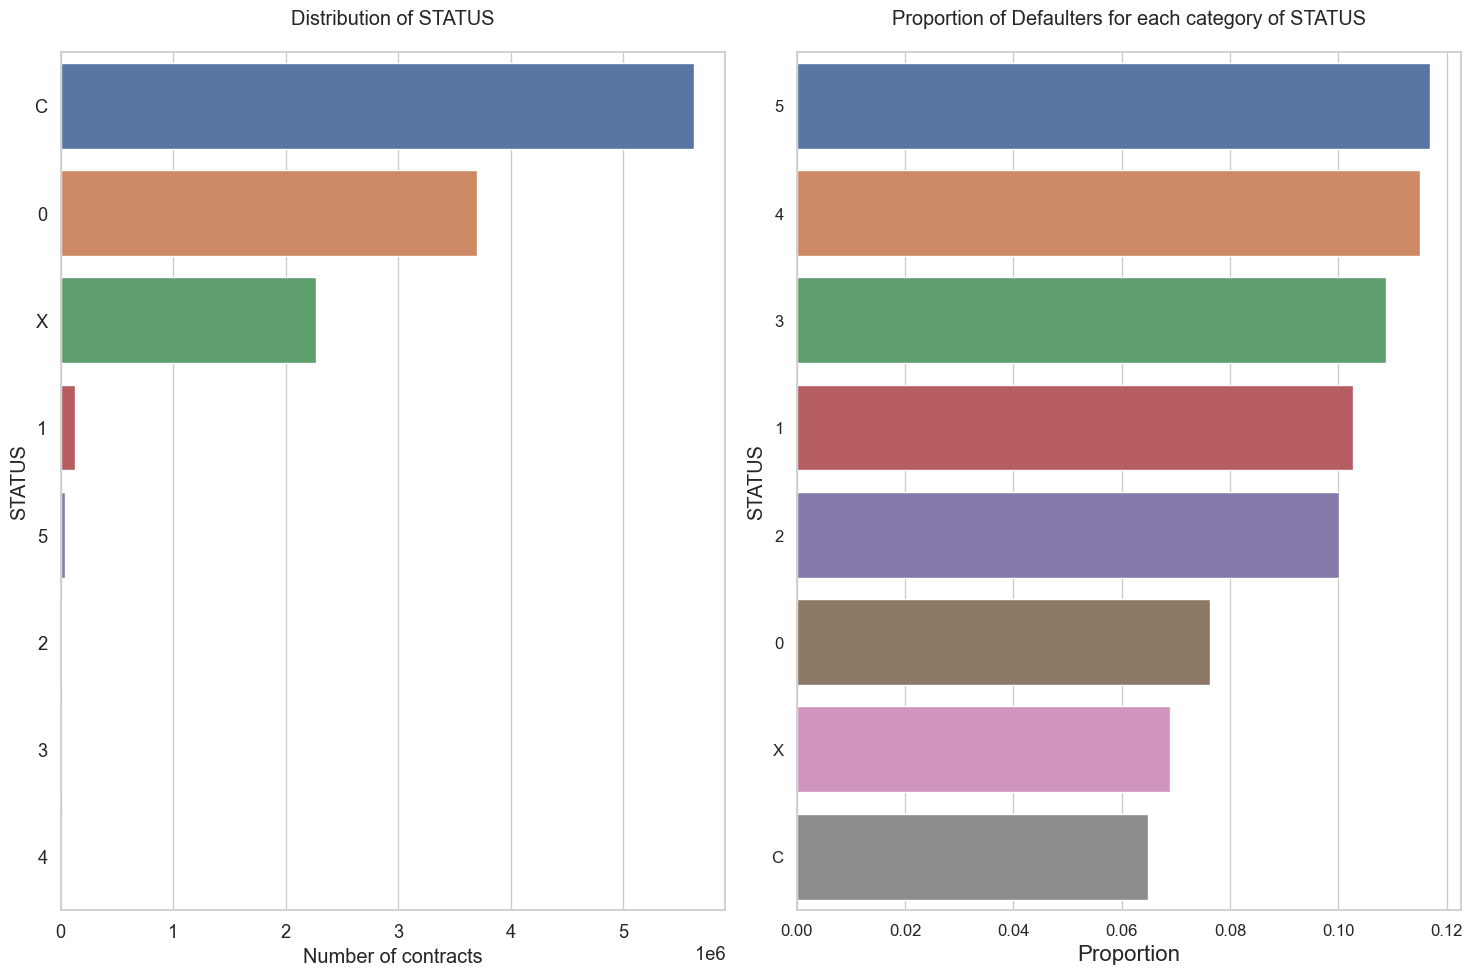

In [9]:
plot_categorical_variables(bureau_balance_merged, 'STATUS', figsize = (15, 10))

<b>Nhận xét: </b> <br>
Có thể thấy ở biểu đồ trên thì category 5 có phần trăm nợ xấu cao nhất, sau đó lần lượt là category 4, category 3, category 1, category 2, category 0, category X và cuối cùng là category C.

'STATUS' có các biến được sắp xếp theo thứ tự:
   - C có nghĩa là Closed, đã đóng
   - X có nghĩa là Trạng thái không xác định được
   - 0 có nghĩa là không bị quá hạn nợ
   - 1 có nghĩa là quá hạn nợ trong vòng 1 tháng, từ 1 đến 30 ngày
   - 2 có nghĩa là quá hạn nợ trong khoảng 31 đến 60 ngày
   - 3 có nghĩa là quá hạn nợ trong khoảng 61 đến 90 ngày
   - 4 có nghĩa là quá hạn nợ trong khoảng 91 đến 120 ngày
   - 5 có nghĩa là quá hạn nợ từ 120 ngày trở nên, hoặc đã bị xếp vào loại nợ không thể thu hồi được nữa

- Feature 'STATUS' trên là biến có thứ bậc, vậy nên sử dụng label encoding sẽ phù hợp hơn là one-hot encoding bởi label encoding vẫn giữ được thứ tự của các giá trị trong biến có thứ bậc, còn one-hot encoding sẽ loại bỏ thứ tự của các giá trị trong biến có thứ bậc. Hơn hết, label encoding đơn giản và hiệu quả hơn one-hot encoding. Label encoding chỉ cần gán một giá trị số cho mỗi giá trị của biến có thứ bậc, trong khi one-hot encoding cần tạo ra nhiều biến độc lập mới.
- Dễ thấy feture 'MONTHS_BALANCE' là 1 biến time series, có thể dùng một số kĩ thuật tạo feature mới dựa vào biến này

# Bureau

Bảng Bureau chứa các thông tin về các khoản vay của khách hàng bên ngoài Home Credit và được báo cáo bởi Credit Bureau Department.

In [10]:
bureau.head()

,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY,SK_ID_CURR
0,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN,254629
1,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN,254629
2,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN,254629
3,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN,254629
4,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN,254629


### Basic Information

In [11]:
print_basic_information(bureau, 'Bureau', ['SK_ID_BUREAU', 'SK_ID_CURR'])

The shape of Bureau is: (1465325, 17)
----------------------------------------------------------------------------------------------------
Number of duplicate values in Bureau: 0
----------------------------------------------------------------------------------------------------
Number of unique SK_ID_BUREAU in Bureau are: 1465325
Number of unique SK_ID_CURR in Bureau are: 263491


<b>Nhận xét</b> <br>
File bureau.csv có gần 1.5M datapoints và 17 features. Trong số 17 features có 2 features là SK_ID_BUREAU và SK_ID_CURR để chỉ ID cho các khoản vay của khách hàng.
- ***SK_ID_BUREAU*** là ID cho khoản vay trước đó của khách hàng từ các tổ chức tài chính khác. Có thể có nhiều khoản vay trước đó tương ứng với một SK_ID_CURR duy nhất, tùy thuộc vào lịch sử vay của khách hàng.
- ***SK_ID_CURR*** là ID cho khoản vay hiện tại của khách hàng với Home Credit.

15 features còn lại là các thông tin về ngày cho vay, loại tín dụng, trạng thái,...

In [12]:
get_column_names_by_type(bureau)

{'int64': ['SK_ID_BUREAU',
  'DAYS_CREDIT',
  'CREDIT_DAY_OVERDUE',
  'CNT_CREDIT_PROLONG',
  'DAYS_CREDIT_UPDATE',
  'SK_ID_CURR'],
 'object': ['CREDIT_ACTIVE', 'CREDIT_CURRENCY', 'CREDIT_TYPE'],
 'float64': ['DAYS_CREDIT_ENDDATE',
  'DAYS_ENDDATE_FACT',
  'AMT_CREDIT_MAX_OVERDUE',
  'AMT_CREDIT_SUM',
  'AMT_CREDIT_SUM_DEBT',
  'AMT_CREDIT_SUM_LIMIT',
  'AMT_CREDIT_SUM_OVERDUE',
  'AMT_ANNUITY']}

### Missing Values

In [13]:
bureau_nan = count_missing_values(bureau)
bureau_nan

Your data frame has 17 columns.
There are 7 columns that have missing values.


,total_nan,percent_nan
AMT_ANNUITY,1130013,77.116885
AMT_CREDIT_MAX_OVERDUE,948545,64.732738
DAYS_ENDDATE_FACT,544673,37.170798
AMT_CREDIT_SUM_LIMIT,489670,33.417160
AMT_CREDIT_SUM_DEBT,223094,15.224882
DAYS_CREDIT_ENDDATE,89098,6.080426
AMT_CREDIT_SUM,3,0.000205


Your data frame has 17 columns.
There are 7 columns that have missing values.


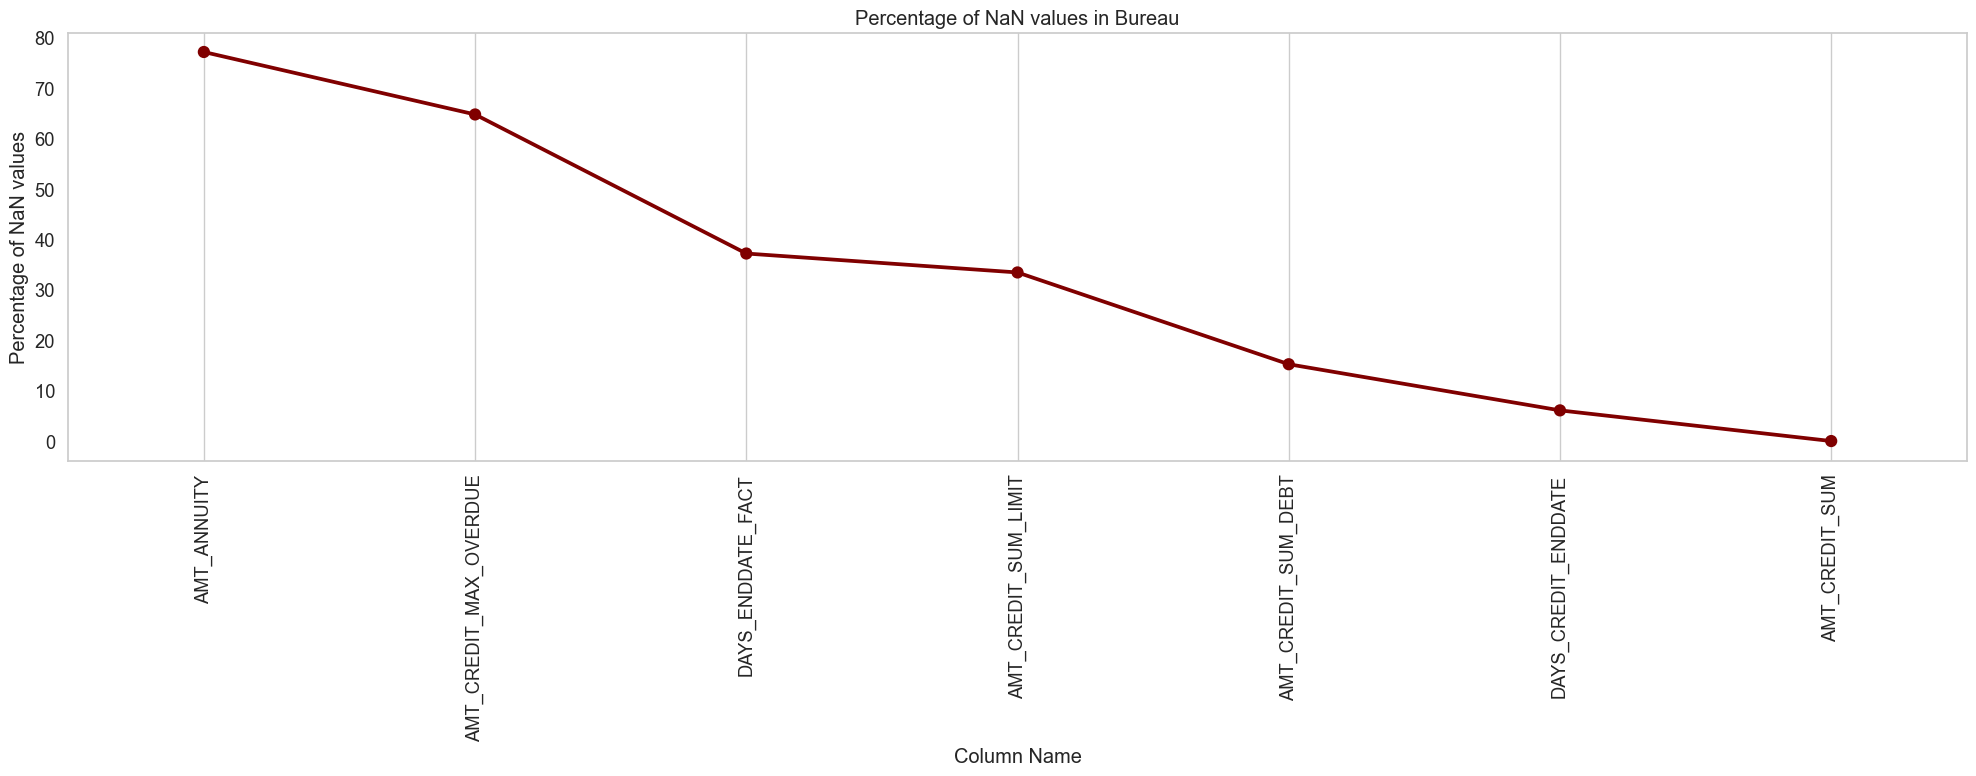

In [14]:
plot_missing_values_percent(bureau, 'Bureau', grid = True)

Trong số 17 features, có 7 features chứa giá trị None. Trong đó features có tỷ lệ missing values cao nhất là AMT_ANNUITY với hơn 75% là missing values.

***Merging the TARGET from application_train to bureau table.***

In [15]:
bureau_merged = pd.merge(application_train[["SK_ID_CURR", "TARGET"]], bureau, how='left', on=['SK_ID_CURR'])
bureau_merged.head()

,SK_ID_CURR,TARGET,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,278621,0,5885877.0,Closed,currency 1,-2586.0,0.0,-2434.0,-2131.0,0.0,0.0,22248.0,0.0,0.0,0.0,Consumer credit,-2131.0,NaN
1,278621,0,5885878.0,Closed,currency 1,-1636.0,0.0,-540.0,-540.0,0.0,0.0,112500.0,0.0,0.0,0.0,Credit card,-540.0,NaN
2,278621,0,5885879.0,Closed,currency 1,-775.0,0.0,-420.0,-621.0,0.0,0.0,72652.5,0.0,0.0,0.0,Consumer credit,-550.0,NaN
3,278621,0,5885880.0,Active,currency 1,-606.0,0.0,1216.0,NaN,0.0,0.0,810000.0,0.0,810000.0,0.0,Credit card,-43.0,NaN
4,139008,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
bureau_merged.shape

(1208578, 18)

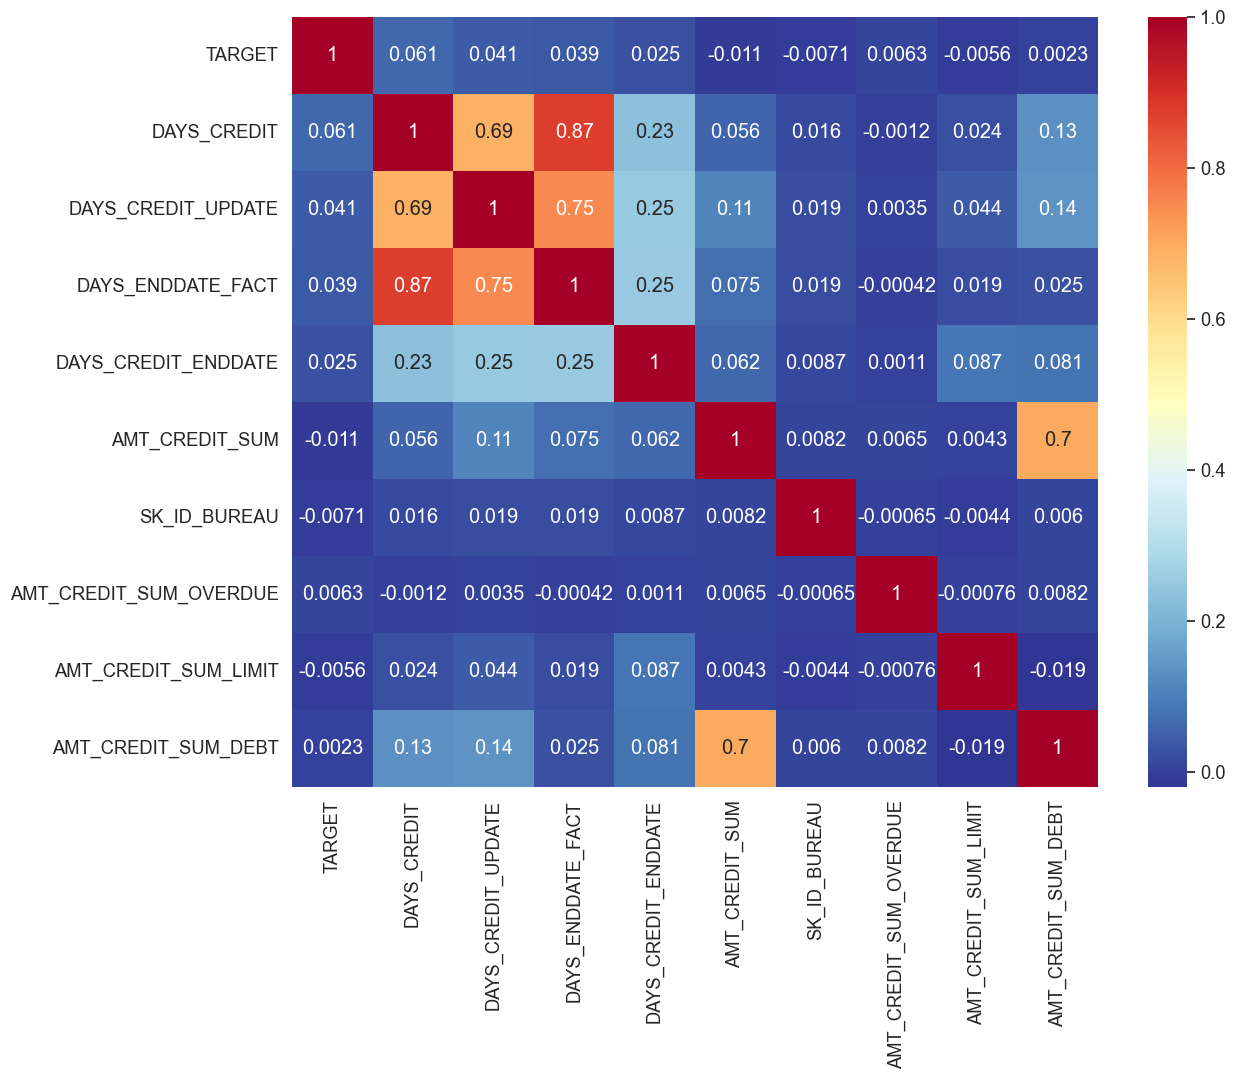

In [17]:
correlation_matrix(bureau_merged._get_numeric_data(), 10, numerical = True)

<b>Nhận xét</b>: <br>
1. Đây là top 10 numerical features ở bảng bureau có mức độ tương quan cao với biến TARGET
2. Một vài cặp features có mức độ tương quan cao hơn hẳn như:
- DAYS_CREDIT và DAYS_ENDDATE_FACT 
- DAYS_CREDIT và DAYS_CREDIT_UPDATE
- DAYS_ENDDATE_FACT và DAYS_CREDIT_UPDATE
- AMT_CREDIT_SUM và AMT_CREDIT_SUM_DEBT
3. Bên cạnh đó, tuy đây là top 10 feature có correlation cao nhất với biến TARGET ở bảng bureau,có thể thấy rằng features không cho thấy mối tương quan tốt/cao với biến TARGET, ngoại trừ đặc điểm DAYS_CREDIT. Điều này ngụ ý rằng không có mối quan hệ tuyến tính trực tiếp giữa TARGET và features. Có thể thực hiện 1 số phép toán tử, transform các feature
4. Ngoài ra, chúng ta có thể thực hiện các phép tính toán tử giữa các feature có mức độ tương quan cao để tạo ra feature mới.

### Categorical Variables

In [18]:
print_unique_categories(bureau_merged, 'CREDIT_ACTIVE', show_counts = True)

----------------------------------------------------------------------------------------------------
The unique categories of 'CREDIT_ACTIVE' are:
['Closed' 'Active' nan 'Sold' 'Bad debt']
----------------------------------------------------------------------------------------------------
Counts of each category are:
CREDIT_ACTIVE
Closed      735070
Active      433798
Sold          4494
Bad debt        16
Name: count, dtype: int64
----------------------------------------------------------------------------------------------------


Total Number of unique categories of CREDIT_ACTIVE = 5


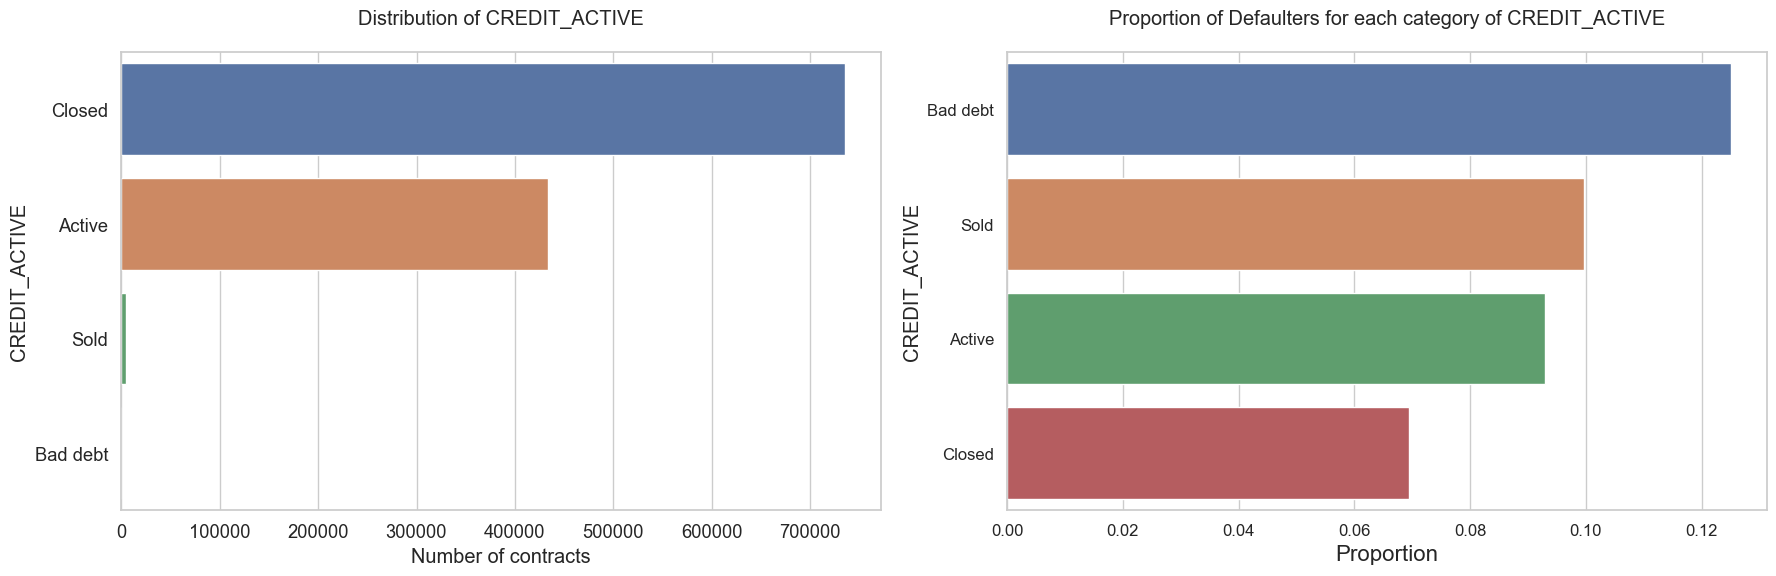

In [19]:
plot_categorical_variables(bureau_merged, column_name = 'CREDIT_ACTIVE')

1. Quan sát biểu đồ đầu tiên - Distribution of CREDIT_ACTIVE, chúng ta thấy rằng phần lớn các khoản vay trước đây từ các tổ chức tài chính khác là Khoản vay đã đóng - Closed, tiếp theo là khoản vay đang hoạt động - Active. Các khoản vay Sold và Bad debt có số lượng rất ít. Khi Feature Engineering chúng ta có thể chỉ tập trung vào 2 trạng thái này
2. Quan sát biểu đồ thứ hai - Proportion of Defaulters for each category of CREDIT_ACTIVE, chúng ta thấy rằng các khoản vay Bad debt đứng đầu tiên, đây là tỷ lệ vỡ nợ cao nhất. Tiếp theo là Sold và Active. Tỷ lệ vỡ nợ thấp nhất là đối với Closed, cho thấy một lịch sử tốt về khách hàng. Điều này cho thấy, mô hình quan sát ở đây là khá hợp lý.

### Continuous Variables

#### with DAYS Features

In [20]:
bureau_merged['DAYS_CREDIT_ENDDATE'].describe()

count    1.102115e+06
mean     4.909742e+02
std      4.955661e+03
min     -4.206000e+04
25%     -1.142000e+03
50%     -3.330000e+02
75%      4.730000e+02
max      3.119800e+04
Name: DAYS_CREDIT_ENDDATE, dtype: float64

In [21]:
bureau_merged['DAYS_ENDDATE_FACT'].describe()

count    737359.000000
mean      -1022.087408
std         718.422310
min      -42023.000000
25%       -1502.000000
50%        -898.000000
75%        -427.000000
max           0.000000
Name: DAYS_ENDDATE_FACT, dtype: float64

In [22]:
bureau_merged['DAYS_CREDIT_UPDATE'].describe()

count    1.173378e+06
mean    -5.993146e+02
std      7.317144e+02
min     -4.194700e+04
25%     -9.030000e+02
50%     -4.060000e+02
75%     -3.300000e+01
max      3.720000e+02
Name: DAYS_CREDIT_UPDATE, dtype: float64

- Biến 'DAYS_CREDIT_ENDDATE' cho biết số ngày còn lại của khoản vay tín dụng CB tính đến thời điểm khách hàng nộp hồ sơ đăng ký tại Home Credit.
- Biến 'DAYS_ENDDATE_FACT' cho biết số ngày kể từ khi khoản vay tín dụng CB kết thúc tính đến thời điểm đăng ký tại Home Credit (chỉ áp dụng cho các khoản vay đã đóng), chỉ tính thời gian liên quan đến khoản đăng ký.
- Biến 'DAYS_CREDIT_UPDATE' cho biết số ngày thông tin mới nhất về khoản vay tín dụng Credit Bureau được cập nhật trước khi nộp đơn vay (Chỉ tính thời gian liên quan đến đơn vay)

Thế nhưng ta có thể thấy ở những biến này có những quan sát mang giá trị rất lớn, quy đổi ra năm sẽ lên đến hơn 1000 năm, điều này trong thực tế thực sự rất vô lý và không đem lại bất cứ ý nghĩa gì. Ngoài ra cũng có rất nhiều các khoản nợ có ngày kết thúc trước đó rất nhiều ngày. Vậy nên ở đây kiến nghị chỉ giữ những quan sát có giá trị quy đổi ra nhỏ hơn 50 năm kể từ thời điểm có khoản vay ở Home Credit. Những quan sát có giá trị quy đổi lớn hơn 50 năm có thể được thay thế bằng giá trị NaN.

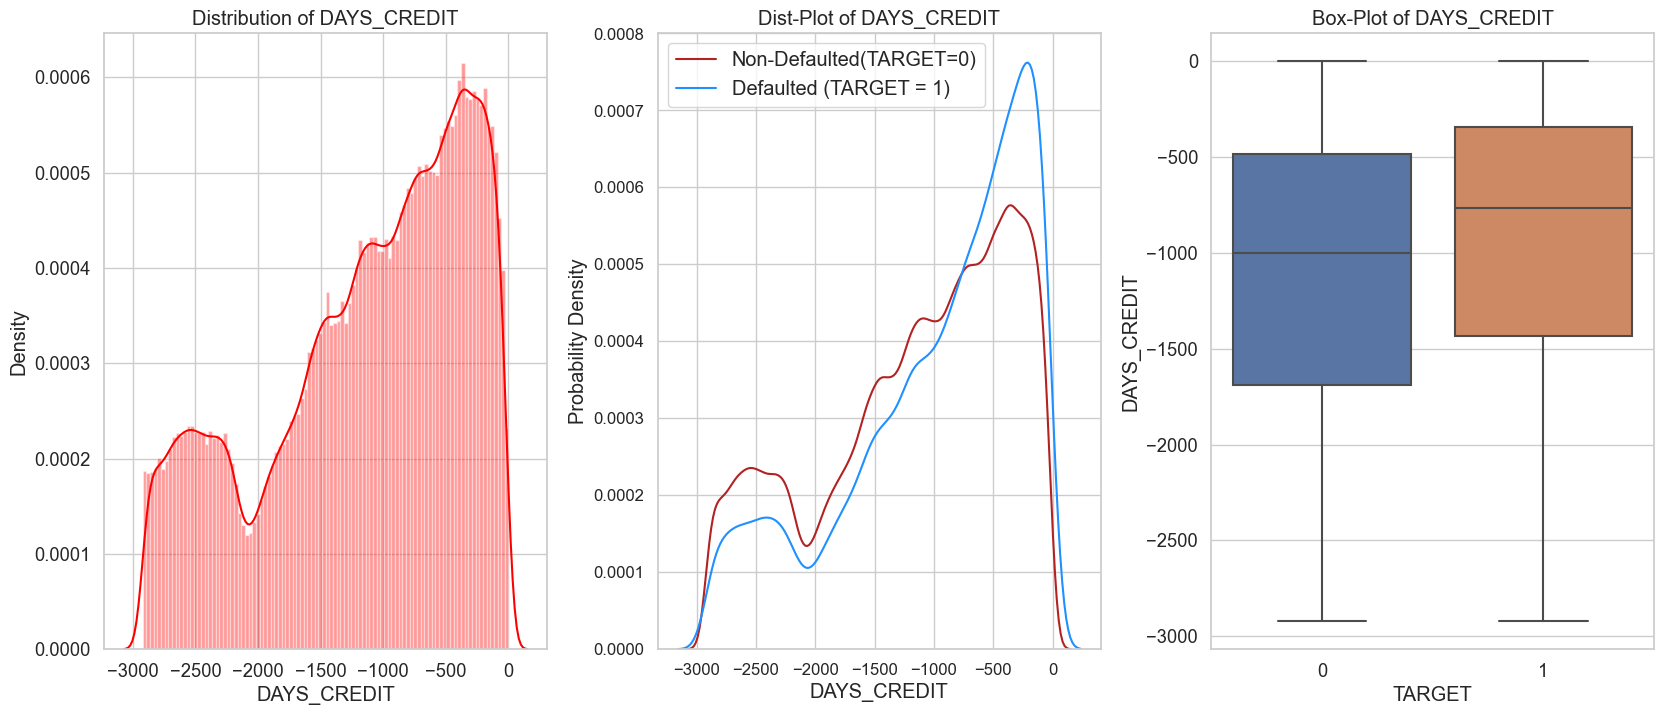

In [23]:
plot_numerical_variables(bureau_merged, column_name = 'DAYS_CREDIT')

Biến 'DAYS_CREDIT' cho biết số ngày trước khi nộp đơn hiện tại, khách hàng đã nộp đơn xin tín dụng Credit Bureau. (Chỉ tính thời gian liên quan đến đơn xin)

1. Quan sát biểu đồ đầu tiên - Distribution of DAYS_CREDIT, ta thấy tập trung nhiều nhất trong khoảng từ 0 đến -500 ngày, thấp nhất là khoảng -2000 đến -2500 ngày.
2. Quan sát biểu đồ thứ hai - Dist-Plot và thứ ba - Box-plot, cả Non-Defaulted và Defaulted đều phân bố nhiều nhất trong khoảng từ 0 đến -500, trong đó tỷ lệ của Defaulted cao hơn hẳn so với Non-Defaulted. 

Sau cả ba biểu đồ cho thấy, Defaulted có tần suất nộp đơn xin tín dụng cao hơn so với Non-Defaulted. Khoảng cách thời gian giữa hai lần nộp đơn của Non-Defaulted thường xa hơn so với Defaulted.

### NEW FEATURE

##### CURRENT_DEBT_TO_CREDIT_RATIO
- Từ biểu đồ heatmap có thể thấy 2 feature 'AMT_CREDIT_SUM_DEBT' và 'AMT_CREDIT_SUM' có độ tương quan rất cao. Đề xuất tạo thêm feature 'CURRENT_DEBT_TO_CREDIT_RATIO' thể hiện tỷ lệ giữa số tiền nợ hiện tại và số tiền tín dụng hiện tại là một yếu tố quan trọng để dự đoán người vay có nợ xấu hay không

In [24]:
bureau_merged['AMT_CREDIT_DEBT_RATE'] = bureau_merged['AMT_CREDIT_SUM_DEBT']/(1 + bureau_merged['AMT_CREDIT_SUM'])

##### CREDIT_DURATION

*Đề xuất tạo thêm features CREDIT_DURATION chứa thông tin về mức độ ổn định và độ dài của khoản vay. Biến này là một biến khá quan trọng để đánh giá khả năng trả nợ của khách hàng.*

In [25]:
bureau_merged['CREDIT_DURATION'] = np.abs(bureau_merged['DAYS_CREDIT'] - bureau_merged['DAYS_CREDIT_ENDDATE'])

#### MAX_AMT_OVERDUE_DURATION_RATIO
*Đánh giá mức độ nợ so với thời gian kéo dài của khoản vay. Nếu tỷ lệ này cao, có thể cho thấy nguy cơ trả nợ không đúng hạn.*

In [26]:
bureau_merged['MAX_AMT_OVERDUE_DURATION_RATIO'] = bureau_merged['AMT_CREDIT_MAX_OVERDUE'] / (bureau_merged['CREDIT_DURATION'] + 0.00001)

#### AMT_OVERDUE_DURATION_LEFT_RATIO
*Cho biết tỷ lệ giữa số tiền nợ hiện tại và thời gian còn lại đến ngày kết thúc của khoản tín dụng. Cung cấp thông tin về mức độ nợ so với thời gian còn lại của khoản vay. Nếu tỷ lệ này cao, có thể cho thấy nguy cơ trả nợ không đúng hạn.*

In [27]:
bureau_merged['AMT_OVERDUE_DURATION_LEFT_RATIO'] = bureau_merged['AMT_CREDIT_SUM_OVERDUE'] / (bureau_merged['DAYS_CREDIT_ENDDATE'] + 0.00001)


#### CNT_PROLONGED_DURATION_RATIO
*Cho biết tỷ lệ giữa số lần gia hạn khoản tín dụng và thời gian giữa ngày đăng ký và ngày kết thúc của khoản tín dụng. Giúp đánh giá tần suất gia hạn khoản vay so với thời gian kéo dài của nó, đồng thời cung cấp thông tin về sự ổn định của khoản vay.*

In [28]:
bureau_merged['CNT_PROLONGED_DURATION_RATIO'] = bureau_merged['CNT_CREDIT_PROLONG'] / (bureau_merged['CREDIT_DURATION'] + 0.00001)

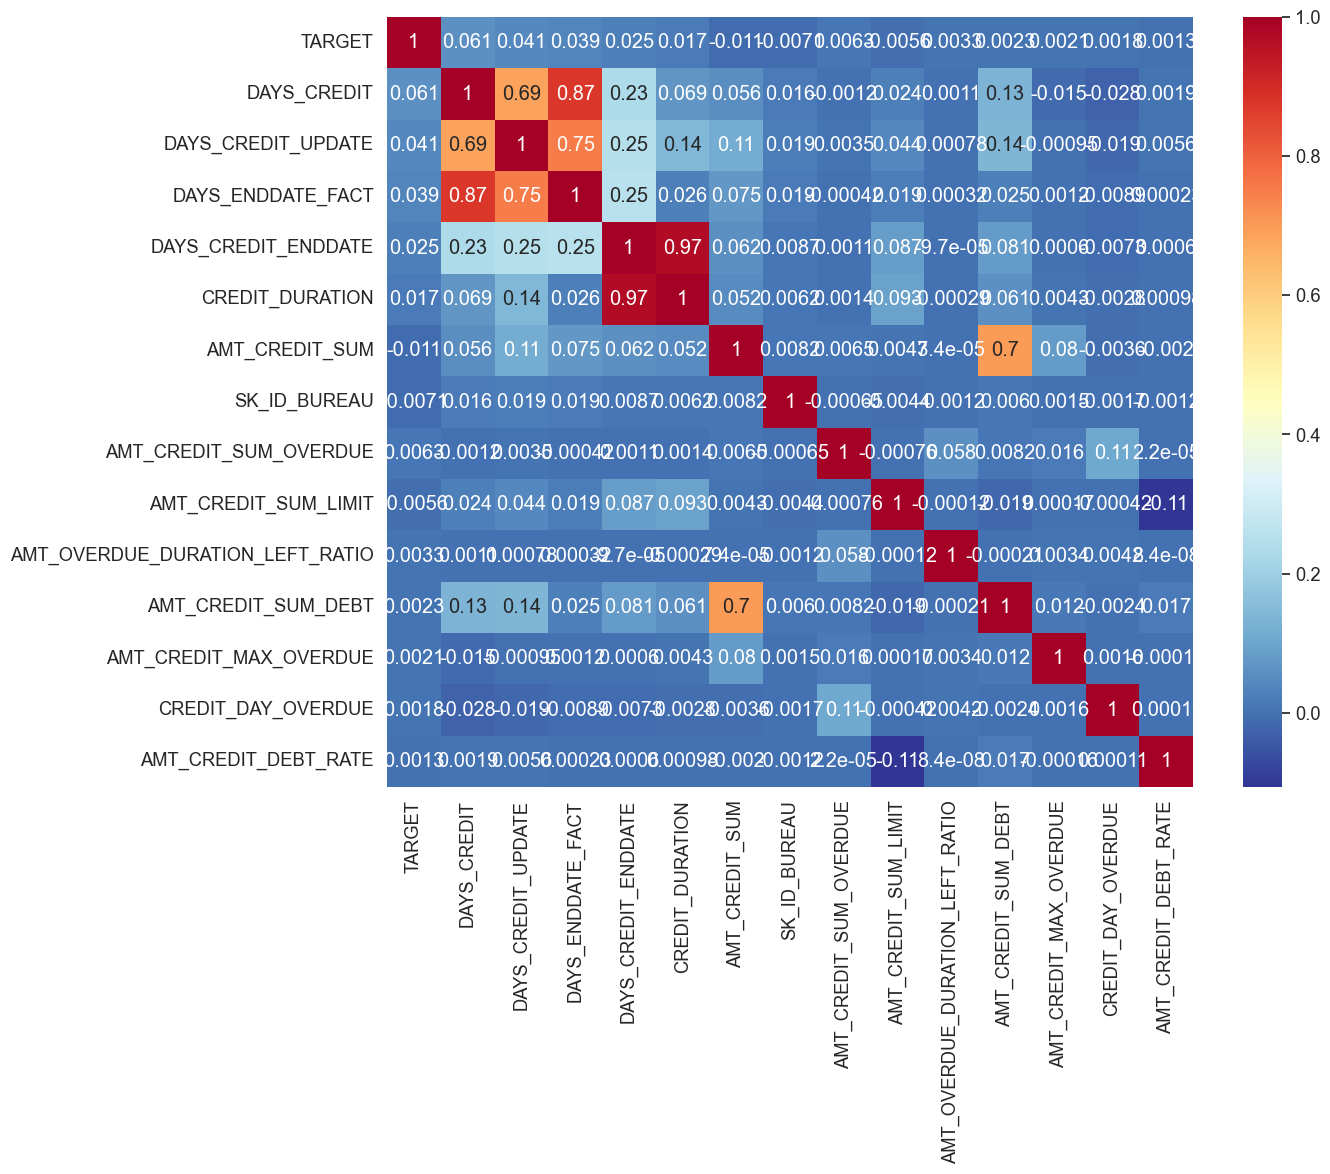

In [29]:
correlation_matrix(bureau_merged, 15, numerical = True)

<b>Nhận xét</b>:
- Dựa vào biểu đồ heatmap có thể thấy những feature mới tạo thành có độ tương quan khá cao với biến 'TARGET'
